In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
geometries = ["CHD2", "NDBR2p5", "NDBR15", "SH115", "CHD4", "NDBR6", "NDBR40"]

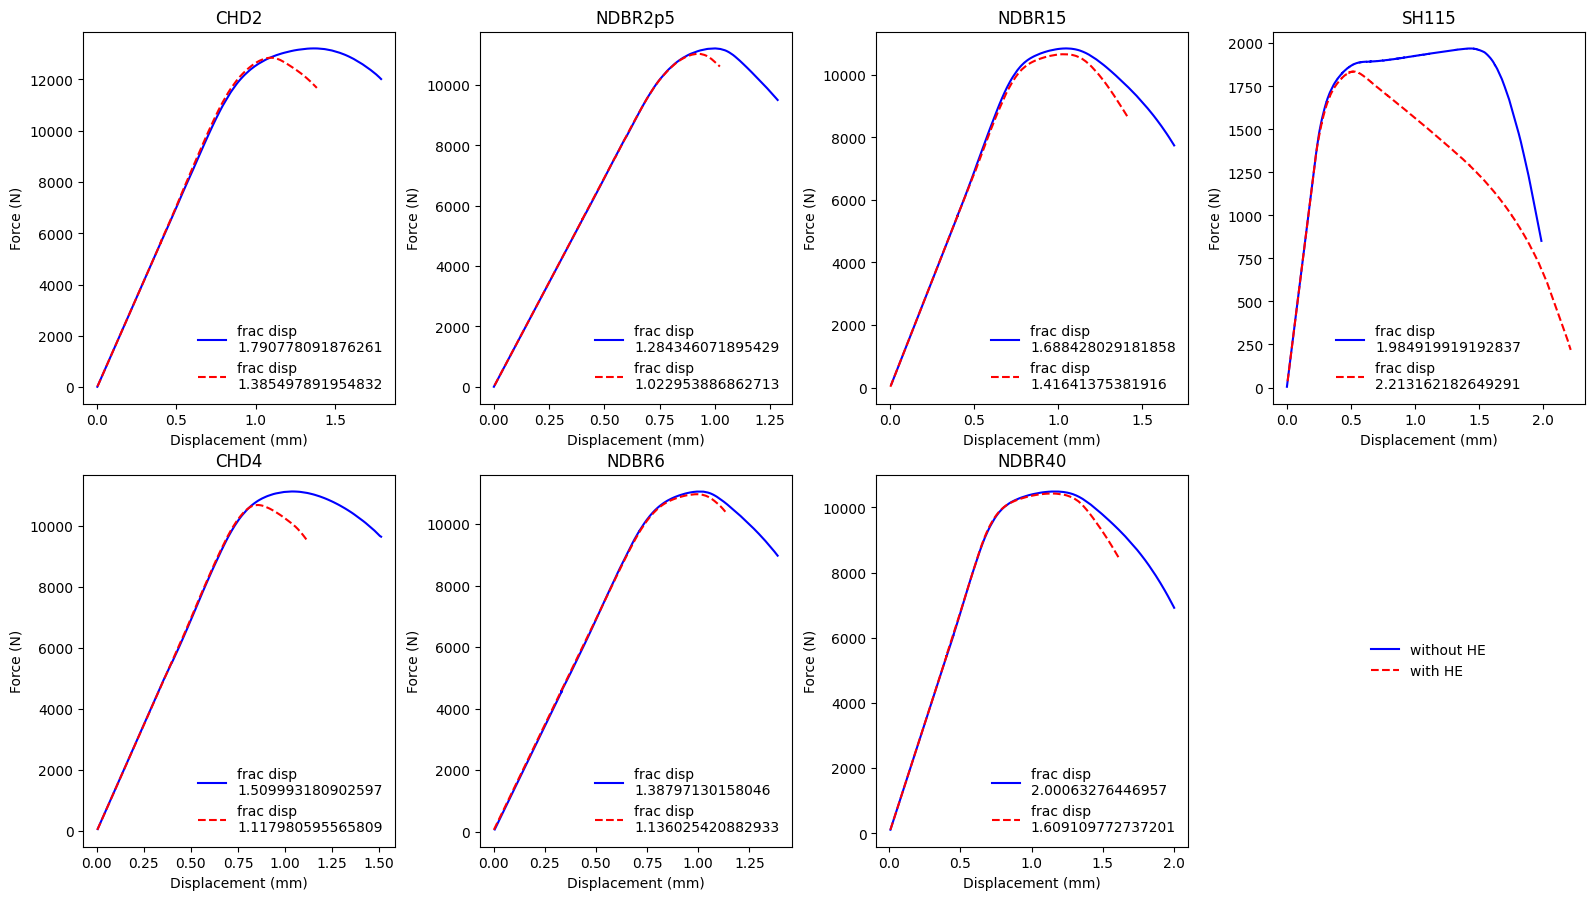

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 9))
# tight layout
# Adjusting layout with padding to avoid overlap
plt.tight_layout(pad=2.0, h_pad=3.0, w_pad=3.0)
ax = ax.ravel()

for i, objective in enumerate(geometries):
    FD_curve_without_HE = pd.read_excel(f"experiment_FD_curve/{objective}_without_HE.xlsx")
    FD_curve_with_HE = pd.read_excel(f"experiment_FD_curve/{objective}_with_HE.xlsx")
    disp_without_HE = FD_curve_without_HE["displacement/mm"]
    frac_disp_without_HE = disp_without_HE.iloc[-1]
    force_without_HE = FD_curve_without_HE["force/N"]
    disp_with_HE = FD_curve_with_HE["displacement/mm"]
    frac_disp_with_HE = disp_with_HE.iloc[-1]
    force_with_HE = FD_curve_with_HE["force/N"]

    ax[i].plot(disp_without_HE, force_without_HE, label=f"frac disp\n{frac_disp_without_HE}", color="blue")
    ax[i].plot(disp_with_HE, force_with_HE, label=f"frac disp\n{frac_disp_with_HE}", color="red", linestyle="--")
    ax[i].set_title(objective)
    ax[i].legend(frameon=False)
    ax[i].set_xlabel("Displacement (mm)")
    ax[i].set_ylabel("Force (N)")

ax[7].axis("off")
ax[7].plot([], [], label="without HE", color="blue")
ax[7].plot([], [], label="with HE", color="red", linestyle="--")
ax[7].legend(frameon=False, loc="center")

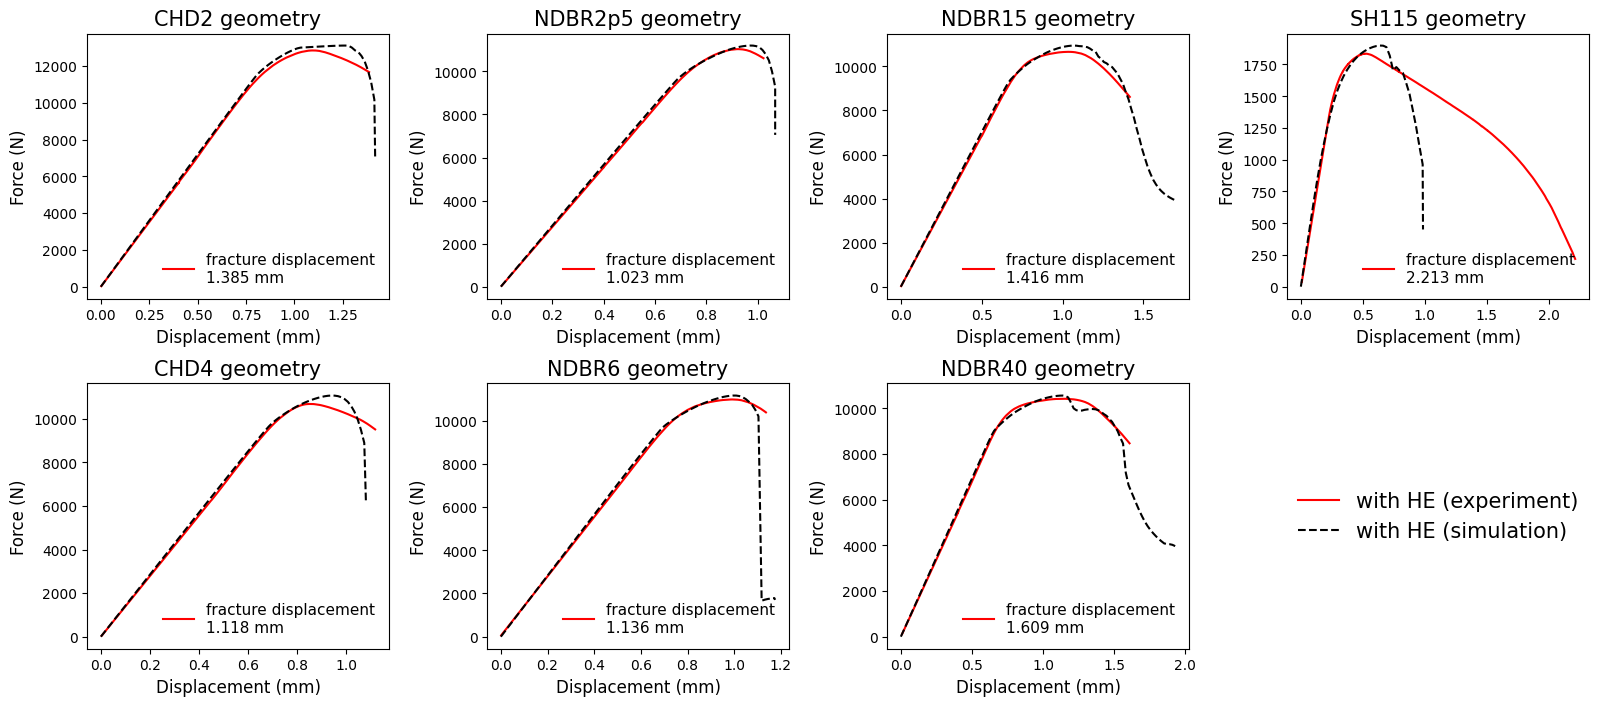

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 7))
# tight layout
# Adjusting layout with padding to avoid overlap
plt.tight_layout(pad=2.0, h_pad=4.0, w_pad=4.0)
ax = ax.ravel()

def read_FD_curve(file_path):
    """
    Read the force-displacement curve from the .txt file from Abaqus output
    """
    output_data = np.loadtxt(file_path, skiprows=2)
    # column 1 is time step
    # column 2 is displacement
    # column 3 is force
    columns = ['X', 'displacement', 'force']
    df = pd.DataFrame(data=output_data, columns=columns)
    # Converting to numpy array
    displacement = df.iloc[:, 1].to_numpy()
    force = df.iloc[:, 2].to_numpy()
    return displacement, force


for i, objective in enumerate(geometries):
    #D_curve_without_HE = pd.read_excel(f"experiment_FD_curve/{objective}_without_HE.xlsx")
    FD_curve_with_HE = pd.read_excel(f"experiment_FD_curve/{objective}_with_HE.xlsx")

    disp_with_HE = FD_curve_with_HE["displacement/mm"]
    frac_disp_with_HE = disp_with_HE.iloc[-1]
    force_with_HE = FD_curve_with_HE["force/N"]

    ax[i].plot(disp_with_HE, force_with_HE, label=f"fracture displacement\n{round(frac_disp_with_HE, 3)} mm", color="red")
    #print(os.getcwd())
    if os.path.exists(f"CP1000_{objective}_with_HE/FD_curve.txt"):
        FD_curve_with_HE_sim_disp_m, FD_curve_with_HE_sim_force = read_FD_curve(f"CP1000_{objective}_with_HE/FD_curve.txt")
        FD_curve_with_HE_sim_disp = FD_curve_with_HE_sim_disp_m * 1000
        frac_disp_with_HE_sim = FD_curve_with_HE_sim_disp[-1]

        ax[i].plot(FD_curve_with_HE_sim_disp, FD_curve_with_HE_sim_force, 
       # label=f"fracture displacement\n{round(frac_disp_with_HE_sim,3)} mm", 
        color="black", linestyle="--")
    ax[i].set_title(f"{objective} geometry", fontsize=15)
    ax[i].legend(frameon=False, loc=4, fontsize=11)
    ax[i].set_xlabel("Displacement (mm)", fontsize=12)
    ax[i].set_ylabel("Force (N)", fontsize=12)

ax[7].axis("off")
ax[7].plot([], [], label="with HE (experiment)", color="red")
ax[7].plot([], [], label="with HE (simulation)", color="black", linestyle="--")
ax[7].legend(frameon=False, loc="center", fontsize=15)

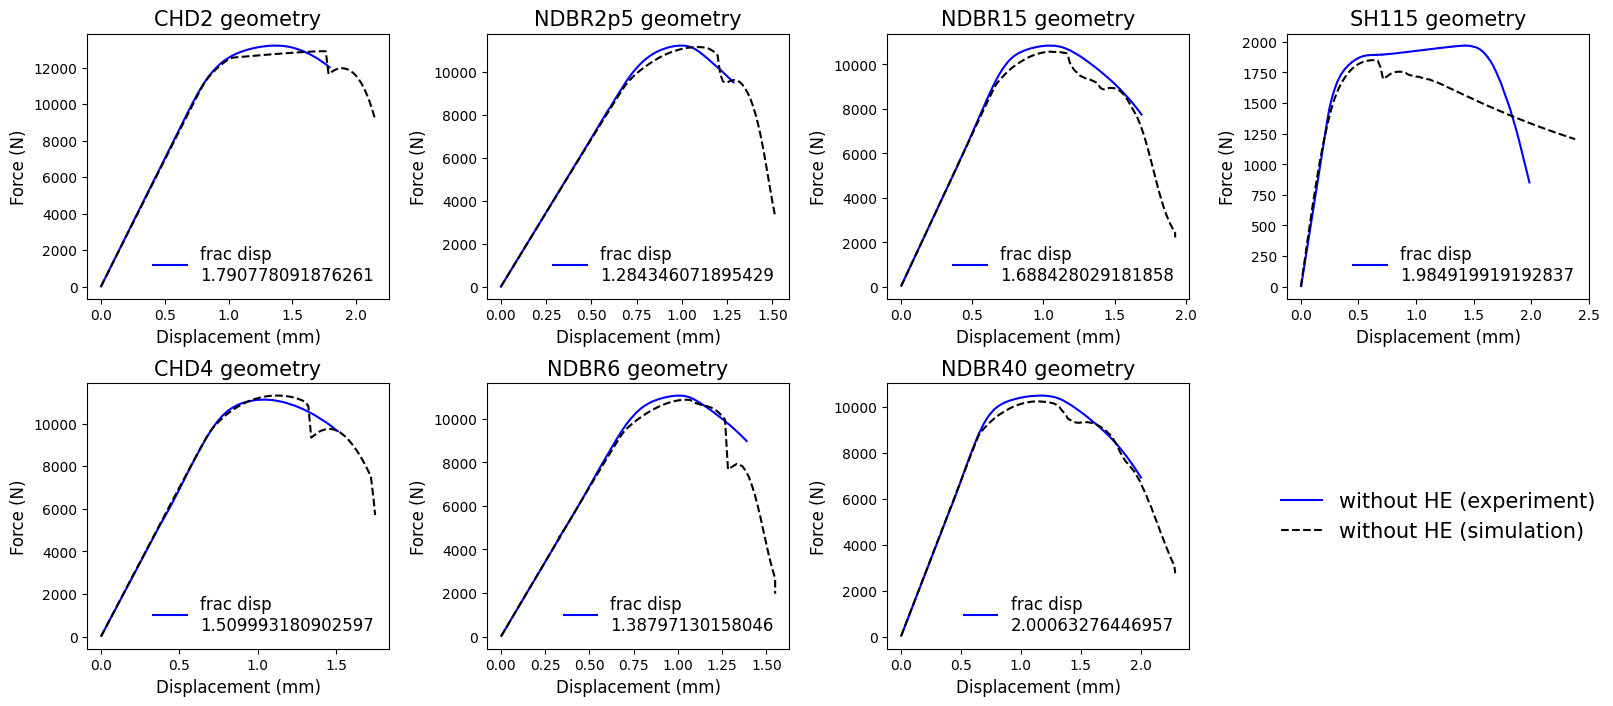

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 7))
# tight layout
# Adjusting layout with padding to avoid overlap
plt.tight_layout(pad=2.0, h_pad=4.0, w_pad=4.0)
ax = ax.ravel()

def read_FD_curve(file_path):
    """
    Read the force-displacement curve from the .txt file from Abaqus output
    """
    output_data = np.loadtxt(file_path, skiprows=2)
    # column 1 is time step
    # column 2 is displacement
    # column 3 is force
    columns = ['X', 'displacement', 'force']
    df = pd.DataFrame(data=output_data, columns=columns)
    # Converting to numpy array
    displacement = df.iloc[:, 1].to_numpy()
    force = df.iloc[:, 2].to_numpy()
    return displacement, force


for i, objective in enumerate(geometries):

    FD_curve_without_HE = pd.read_excel(f"experiment_FD_curve/{objective}_without_HE.xlsx")

    disp_without_HE = FD_curve_without_HE["displacement/mm"]
    frac_disp_without_HE = disp_without_HE.iloc[-1]
    force_without_HE = FD_curve_without_HE["force/N"]

    ax[i].plot(disp_without_HE, force_without_HE, label=f"frac disp\n{frac_disp_without_HE}", color="blue")
   
    if os.path.exists(f"CP1000_{objective}_without_HE/FD_curve.txt"):
        FD_curve_without_HE_sim_disp_m, FD_curve_without_HE_sim_force = read_FD_curve(f"CP1000_{objective}_without_HE/FD_curve.txt")
        FD_curve_without_HE_sim_disp = FD_curve_without_HE_sim_disp_m * 1000
        frac_disp_without_HE_sim = FD_curve_without_HE_sim_disp[-1]

        ax[i].plot(FD_curve_without_HE_sim_disp, FD_curve_without_HE_sim_force, 
        #label=f"frac disp\n{frac_disp_without_HE_sim}", 
        color="black", linestyle="--")
    ax[i].set_title(f"{objective} geometry", fontsize=15)
    ax[i].legend(frameon=False, loc=4, fontsize=12)
    ax[i].set_xlabel("Displacement (mm)", fontsize=12)
    ax[i].set_ylabel("Force (N)", fontsize=12)

ax[7].axis("off")
ax[7].plot([], [], label="without HE (experiment)", color="blue")
ax[7].plot([], [], label="without HE (simulation)", color="black", linestyle="--")
ax[7].legend(frameon=False, loc="center", fontsize=15)

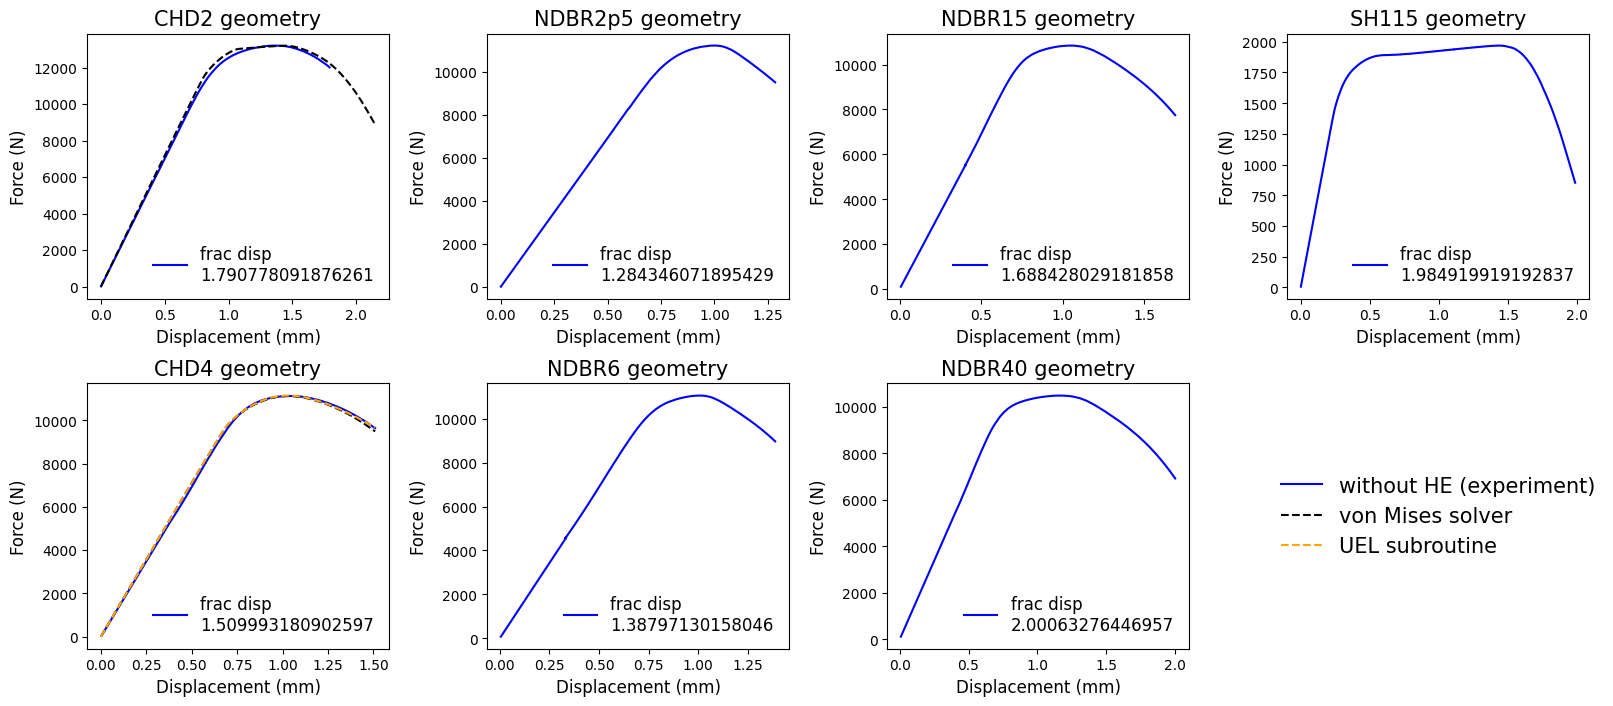

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 7))
# tight layout
# Adjusting layout with padding to avoid overlap
plt.tight_layout(pad=2.0, h_pad=4.0, w_pad=4.0)
ax = ax.ravel()

def read_FD_curve(file_path):
    """
    Read the force-displacement curve from the .txt file from Abaqus output
    """
    output_data = np.loadtxt(file_path, skiprows=2)
    # column 1 is time step
    # column 2 is displacement
    # column 3 is force
    columns = ['X', 'displacement', 'force']
    df = pd.DataFrame(data=output_data, columns=columns)
    # Converting to numpy array
    displacement = df.iloc[:, 1].to_numpy()
    force = df.iloc[:, 2].to_numpy()
    return displacement, force


for i, objective in enumerate(geometries):

    FD_curve_without_HE = pd.read_excel(f"experiment_FD_curve/{objective}_without_HE.xlsx")

    disp_without_HE = FD_curve_without_HE["displacement/mm"]
    frac_disp_without_HE = disp_without_HE.iloc[-1]
    force_without_HE = FD_curve_without_HE["force/N"]

    ax[i].plot(disp_without_HE, force_without_HE, label=f"frac disp\n{frac_disp_without_HE}", color="blue")
   
    if os.path.exists(f"CP1000_{objective}_von_Mises/FD_curve.txt"):
        FD_curve_without_HE_sim_disp_m, FD_curve_without_HE_sim_force = read_FD_curve(f"CP1000_{objective}_von_Mises/FD_curve.txt")
        FD_curve_without_HE_sim_disp = FD_curve_without_HE_sim_disp_m * 1000
        frac_disp_without_HE_sim = FD_curve_without_HE_sim_disp[-1]

        ax[i].plot(FD_curve_without_HE_sim_disp, FD_curve_without_HE_sim_force, 
        #label=f"frac disp\n{frac_disp_without_HE_sim}", 
        color="black", linestyle="--")

    if os.path.exists(f"CP1000_{objective}_UEL/FD_curve.txt"):
        FD_curve_without_HE_sim_disp_m, FD_curve_without_HE_sim_force = read_FD_curve(f"CP1000_{objective}_UEL/FD_curve.txt")
        FD_curve_without_HE_sim_disp = FD_curve_without_HE_sim_disp_m * 1000
        frac_disp_without_HE_sim = FD_curve_without_HE_sim_disp[-1]

        ax[i].plot(FD_curve_without_HE_sim_disp, FD_curve_without_HE_sim_force, 
        #label=f"frac disp\n{frac_disp_without_HE_sim}", 
        color="orange", linestyle="--")


    ax[i].set_title(f"{objective} geometry", fontsize=15)
    ax[i].legend(frameon=False, loc=4, fontsize=12)
    ax[i].set_xlabel("Displacement (mm)", fontsize=12)
    ax[i].set_ylabel("Force (N)", fontsize=12)

ax[7].axis("off")
ax[7].plot([], [], label="without HE (experiment)", color="blue")
ax[7].plot([], [], label="von Mises solver", color="black", linestyle="--")
ax[7].plot([], [], label="UEL subroutine", color="orange", linestyle="--")
#ax[7].plot([], [], label="UEL subroutine with SRI", color="purple", linestyle="--")
ax[7].legend(frameon=False, loc="center", fontsize=15)

### Plotting Lode angle - Stress triaxility

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

IndexError: index 7 is out of bounds for axis 0 with size 2

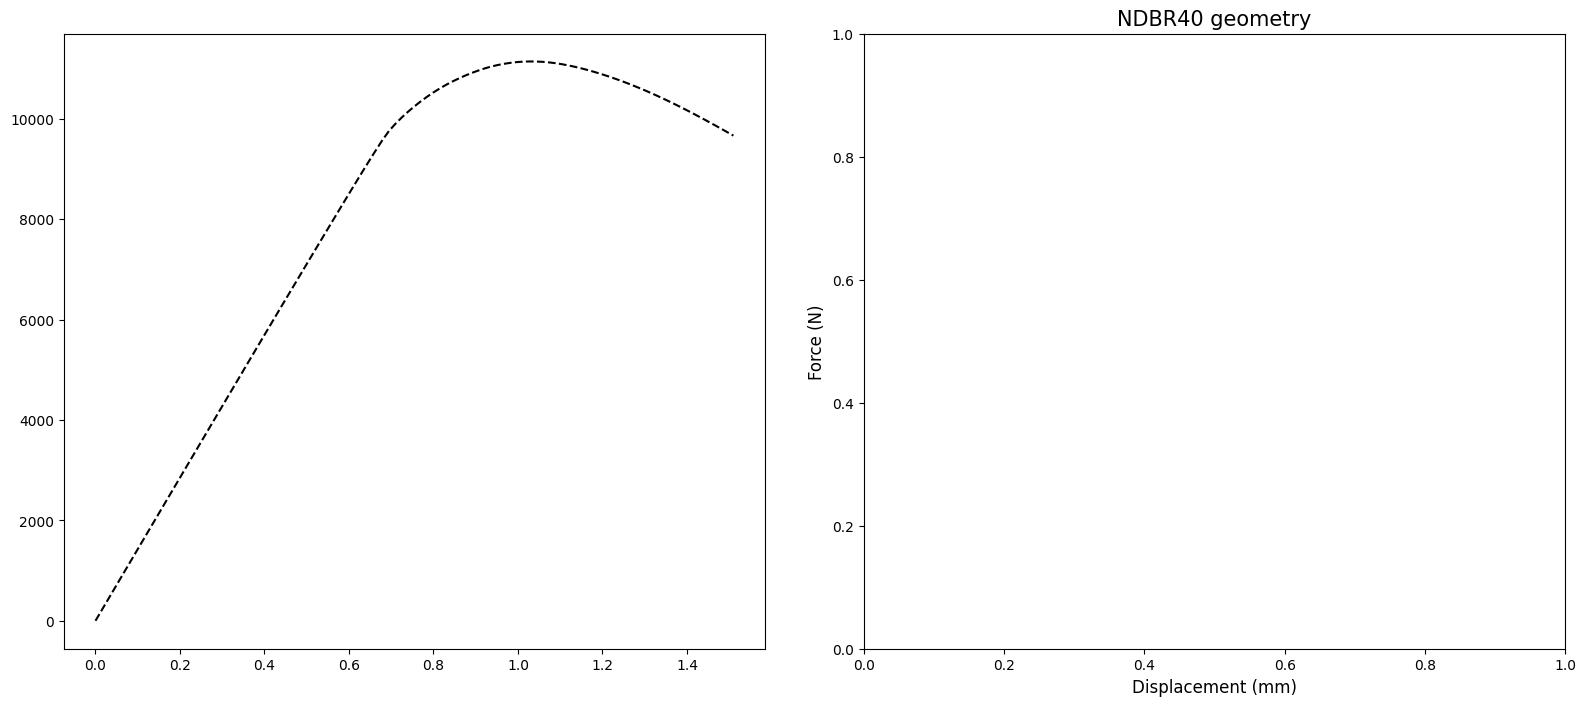

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))
# tight layout
# Adjusting layout with padding to avoid overlap
plt.tight_layout(pad=2.0, h_pad=4.0, w_pad=4.0)
ax = ax.ravel()

def read_triax_lode_curve(file_path):
    output_data = np.loadtxt(file_path, skiprows=2)
    columns = ['X', 'AVERAGE_LODE', 'AVERADE_TRIAX']
    df = pd.DataFrame(data=output_data, columns=columns)
    # Converting to numpy array
    lode = df.iloc[1:, 1].to_numpy()
    triax = df.iloc[1:, 2].to_numpy()
    return lode, triax


for i, objective in enumerate(geometries):

    if os.path.exists(f"CP1000_{objective}_von_Mises/triax_lode.txt"):
        lode, triax = read_triax_lode_curve(f"CP1000_{objective}_von_Mises/triax_lode.txt")

        ax[i].plot(FD_curve_without_HE_sim_disp, FD_curve_without_HE_sim_force, 
        #label=f"frac disp\n{frac_disp_without_HE_sim}", 
        color="black", linestyle="--")
    ax[1].set_title(f"{objective} geometry", fontsize=15)
    ax[1].legend(frameon=False, loc=4, fontsize=12)
    ax[1].set_xlabel("Displacement (mm)", fontsize=12)
    ax[1].set_ylabel("Force (N)", fontsize=12)

ax[7].axis("off")
ax[7].plot([], [], label="without HE (experiment)", color="blue")
ax[7].plot([], [], label="without HE (simulation)", color="black", linestyle="--")
ax[7].legend(frameon=False, loc="center", fontsize=15)

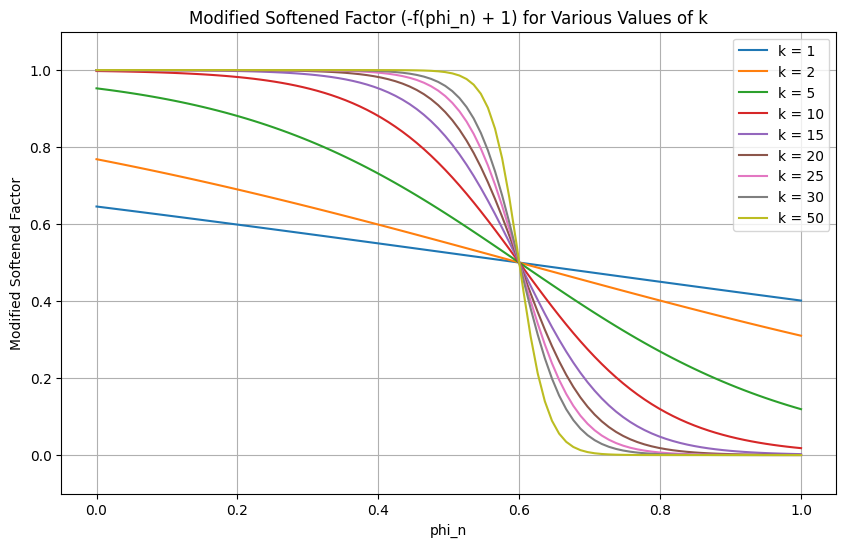

In [6]:
# Modify the function to include the minus sign and then add 1
def modified_softened_factor(phi_n, k, xkap=0):
    return 1 - (1 / (1 + np.exp(-k * (phi_n - 0.6)))) + xkap

# Initialize the plot
plt.figure(figsize=(10, 6))

k_values = [1, 2, 5,10,15,20,25,30,50]
phi_n_values = np.linspace(0, 1, 100)
# Plot modified softened factor for each k value
for k in k_values:
    modified_factors = modified_softened_factor(phi_n_values, k)
    plt.plot(phi_n_values, modified_factors, label=f'k = {k}')

# Add labels and title
plt.xlabel('phi_n')
plt.ylabel('Modified Softened Factor')
plt.title('Modified Softened Factor (-f(phi_n) + 1) for Various Values of k')
plt.legend()
plt.ylim(-0.1,1.1)
plt.grid(True)

# Show the plot
plt.show()

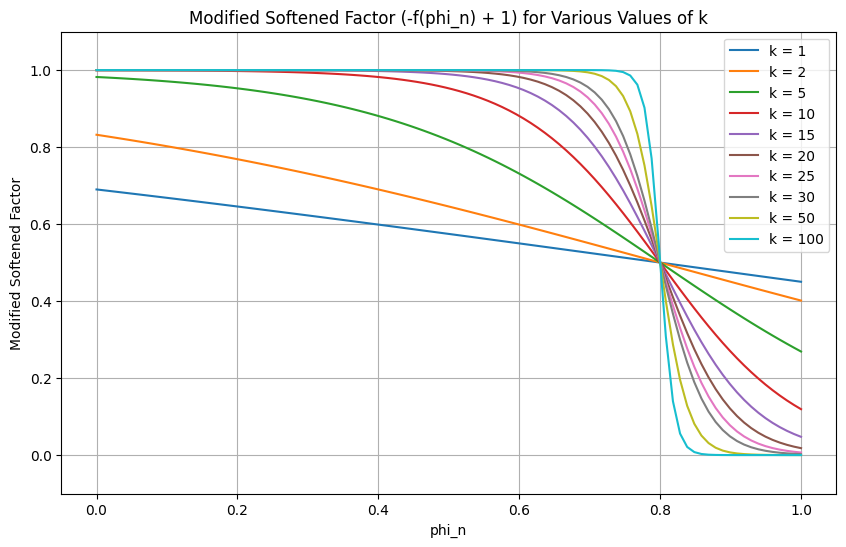

In [7]:
# Modify the function to include the minus sign and then add 1
def modified_softened_factor(phi_n, k, xkap=0):
    return 1 - (1 / (1 + np.exp(-k * (phi_n - 0.8)))) + xkap

# Initialize the plot
plt.figure(figsize=(10, 6))

k_values = [1, 2, 5,10,15,20,25,30,50,100]
phi_n_values = np.linspace(0, 1, 100)
# Plot modified softened factor for each k value
for k in k_values:
    modified_factors = modified_softened_factor(phi_n_values, k)
    plt.plot(phi_n_values, modified_factors, label=f'k = {k}')

# Add labels and title
plt.xlabel('phi_n')
plt.ylabel('Modified Softened Factor')
plt.title('Modified Softened Factor (-f(phi_n) + 1) for Various Values of k')
plt.legend()
plt.ylim(-0.1,1.1)
plt.grid(True)

# Show the plot
plt.show()

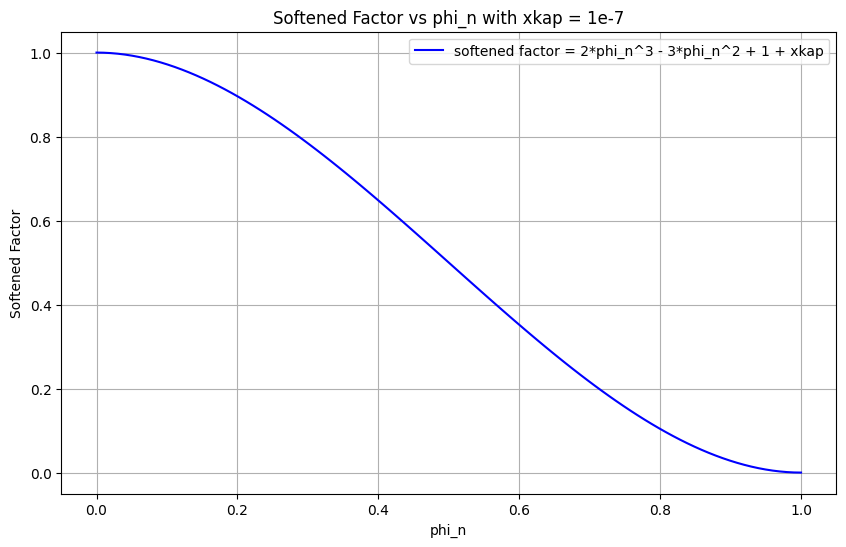

In [8]:
# Remove LaTeX from label to avoid parsing issues
# Initialize the plot again without LaTeX-style math text
plt.figure(figsize=(10, 6))

def cubic_softened_factor(phi_n, xkap=1e-7):
    return (2.0 * phi_n**3 - 3.0 * phi_n**2 + 1.0) + xkap

# Plot the softened factor for the phi_n range (0 to 1)
softened_factors = cubic_softened_factor(phi_n_values)

# Plot the softened factor curve
plt.plot(phi_n_values, softened_factors, label='softened factor = 2*phi_n^3 - 3*phi_n^2 + 1 + xkap', color='b')

# Add labels and title
plt.xlabel('phi_n')
plt.ylabel('Softened Factor')
plt.title('Softened Factor vs phi_n with xkap = 1e-7')
plt.grid(True)

# Show the plot
plt.legend()
plt.show()


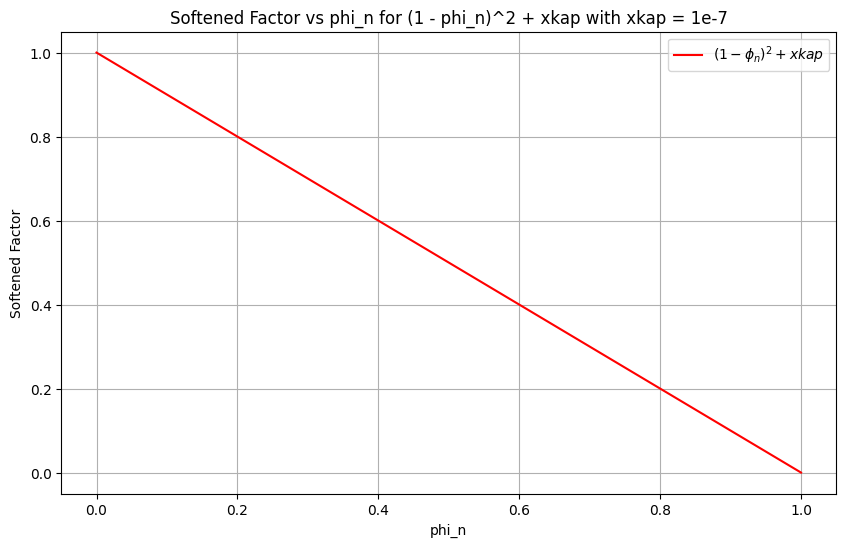

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the new softened factor function (1 - phi_n)^2 + xkap
def quadratic_softened_factor(phi_n, xkap=1e-7):
    return (1 - phi_n)**1.0 + xkap

# Define phi_n range (0 to 1)
phi_n_values = np.linspace(0, 1, 500)

# Initialize the plot
plt.figure(figsize=(10, 6))

# Calculate the softened factor for the range of phi_n values (0 to 1)
softened_factors_quadratic = quadratic_softened_factor(phi_n_values)

# Plot the quadratic softened factor curve
plt.plot(phi_n_values, softened_factors_quadratic, label=r'$(1 - \phi_n)^2 + xkap$', color='r')

# Add labels and title
plt.xlabel('phi_n')
plt.ylabel('Softened Factor')
plt.title('Softened Factor vs phi_n for (1 - phi_n)^2 + xkap with xkap = 1e-7')
plt.grid(True)

# Show the plot
plt.legend()
plt.show()